In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import torch
import pandas as pd
from wrapers import *

In [3]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [4]:
def plot_tSNE(embedded_data, ids, 
              n_iter=300, figsize=(10,10), 
              verbose=1, hue_callback=None, 
              fig=None, ax=None,
              title=""):
    tsne = TSNE(n_components=2, verbose=verbose, perplexity=40, n_iter=n_iter)
    tsne_results = tsne.fit_transform(embedded_data)
    df = pd.DataFrame({})
    df['X'] = tsne_results[:,0]
    df['Y'] = tsne_results[:,1]
    df['id'] = ids
    #
    if hue_callback is not None:
        df["target"] = hue_callback(df, embedded_data, ids)
    #
    #
    np.random.seed(42)    
    rndperm = np.random.permutation(df.shape[0])
    #
    if ax is None and fig is None:
        fig = plt.figure(figsize=figsize)

    if ax is None:
        ax = fig.subplots()    
    sns.scatterplot(
        x="X", y="Y",
        hue= None if hue_callback is None else "target",
        palette=sns.color_palette("Set1", 100),
        data=df.loc[rndperm,:],
        legend="full",
        alpha=0.3,
        ax=ax
    )
    ax.set_title(title)
    return ax, df
    

In [5]:
data_source = pd.read_csv('../data/TASK1 Material_Drug_SMILES.csv')

In [6]:
iso_smiles, smiles_id_dict, smiles_graphs = smiles_to_graphs(data_source["drugbank_id"].values,
                                                             data_source["SMILES"].values, isomericSmiles=True)

[21:57:37] Explicit valence for atom # 13 Cl, 5, is greater than permitted
[21:57:37] SMILES Parse Error: syntax error while parsing: OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]
[21:57:37] SMILES Parse Error: Failed parsing SMILES 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]' for input: 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]'


The smiles id 1691:DB01929 has been failed.
The smiles id 1760:DB01999 has been failed.


[21:57:37] Explicit valence for atom # 19 O, 2, is greater than permitted


The smiles id 2382:DB02667 has been failed.


[21:57:38] Explicit valence for atom # 0 O, 3, is greater than permitted
[21:57:38] Unusual charge on atom 0 number of radical electrons set to zero
[21:57:39] Explicit valence for atom # 1 Al, 4, is greater than permitted


The smiles id 3717:DB04100 has been failed.
The smiles id 4034:DB04444 has been failed.


[21:57:40] Explicit valence for atom # 13 Be, 4, is greater than permitted


The smiles id 6588:DB08276 has been failed.


[21:57:40] Explicit valence for atom # 84 N, 4, is greater than permitted
[21:57:40] SMILES Parse Error: syntax error while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
[21:57:40] SMILES Parse Error: Failed parsing SMILES 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1' for input: 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1'


The smiles id 7539:DB09385 has been failed.
The smiles id 7944:DB11630 has been failed.


[21:57:41] Explicit valence for atom # 1 Cl, 4, is greater than permitted


The smiles id 8630:DB12453 has been failed.


[21:57:42] WARNING: not removing hydrogen atom without neighbors
[21:57:42] WARNING: not removing hydrogen atom without neighbors
[21:57:43] Explicit valence for atom # 1 B, 6, is greater than permitted


The smiles id 11585:DB17408 has been failed.


[21:57:53] Unusual charge on atom 42 number of radical electrons set to zero
[21:58:22] WARNING: not removing hydrogen atom without neighbors
[21:58:22] WARNING: not removing hydrogen atom without neighbors


#### Datasets
Single element itertable dataset: For actual prediction (stream_dataset).

In [7]:
from torch.utils.data.dataloader import DataLoader


stream_dataset = CompoundsStream(iso_smiles, smiles_graphs, smiles_id_dict)
stream_loader = DataLoader(dataset=stream_dataset, batch_size = 1)

#### The model executions:

In [8]:
model = GAT_GCN_augmented()
model.load_state_dict(torch.load("../GraphDTA/model_GAT_GCN_davis.model", map_location=torch.device('cpu'), weights_only=True))

<All keys matched successfully>

In [9]:
model.eval()       
embedded_mols = []
with torch.no_grad():
    for data in stream_loader:        
        m = model.g_embedding(data)
        embedded_mols.append(m)

/home/roozbeh/Desktop/comp-bio/task1/notebooks/wrapers.py:407: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  yield torch.Tensor(features), torch.LongTensor(np.array(edge_index)).transpose(1, 0), id


In [10]:
arr_embedded_mols = np.array([ item[0].numpy().reshape(-1) for item in embedded_mols])
ids = [ str(item[1][0]) for item in embedded_mols ]

# Save to disk

In [11]:
len(embedded_mols), data_source.shape, data_source.shape[0] - len(embedded_mols), data_source.shape[0]-len(iso_smiles)

(11914, (11924, 4), 10, 10)

In [12]:
def save_csv(embedded_mols, method_name, extra=""):
    df = pd.DataFrame({
        'embedding':[str(item.view(-1).numpy().tolist()) for item,_ in embedded_mols],
        'label':[str(item[0]) for _, item in embedded_mols]
    })
    df.to_csv(f"../data/drug_{method_name}{extra}_label.csv", index=False)
    
    

In [20]:
save_csv(embedded_mols, "GraphDTA_GATGCN_davis")

In [14]:
df2 = data_source.set_index("drugbank_id")
def Is_single_matom_mol(id):
    # Single atom Mol
    smiles = df2.loc[id]["SMILES"]
    mol = Chem.MolFromSmiles(smiles)    
    return len(mol.GetBonds()) == 0

def hue_callback(df, embedded_data, ids):
    targets = [""] * df.shape[0]
    for i in range(df.shape[0]):
        if Is_single_matom_mol(ids[i]):
            targets[i] = "single"
    
    return targets

In [15]:
def get_plot_info_by_smiles(smiles, df_tSNE):
    id, drug_name, drug_type, _ = data_source.loc[data_source["SMILES"] == smiles].to_numpy()[0]    
    x,y,*_ = df_tSNE.loc[df_tSNE['id'] == id].to_numpy()[0]
    return x,y,id,drug_name, drug_type

def get_plot_info_by_id(id, df_tSNE):
    _, drug_name, drug_type, _ = data_source.loc[data_source["drugbank_id"] == id].to_numpy()[0]    
    x,y,*_ = df_tSNE.loc[df_tSNE['id'] == id].to_numpy()[0]
    return x,y,id,drug_name, drug_type

def annotate_smiles(smiles, df_tSNE, x_shift=-10, y_shift=-10):
    x,y,id,drug_name, drug_type = get_plot_info_by_smiles(smiles, df_tSNE)
    plt.annotate(f'{drug_name}',xy=(x,y),xytext=(x+x_shift,y+y_shift),
                   arrowprops={"width":.4,"headwidth":2,'headlength':2},
                   horizontalalignment='center',fontsize=8)

def annotate_id(id, df_tSNE, x_shift=-10, y_shift=-10):
    x,y,id,drug_name, drug_type = get_plot_info_by_id(id, df_tSNE)
    plt.annotate(f'{drug_name}',xy=(x,y),xytext=(x+x_shift,y+y_shift),
                   arrowprops={"width":.4,"headwidth":2,'headlength':2},
                   horizontalalignment='center',fontsize=8) 

/home/roozbeh/Desktop/comp-bio/task1/.venv_graphdta/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
[22:03:07] Unusual charge on atom 0 number of radical electrons set to zero
[22:03:11] WARNING: not removing hydrogen atom without neighbors
[22:03:11] WARNING: not removing hydrogen atom without neighbors
/tmp/ipykernel_3178965/2623402130.py:25: UserWarning: The palette list has more values (100) than needed (2), which may not be intended.
  sns.scatterplot(


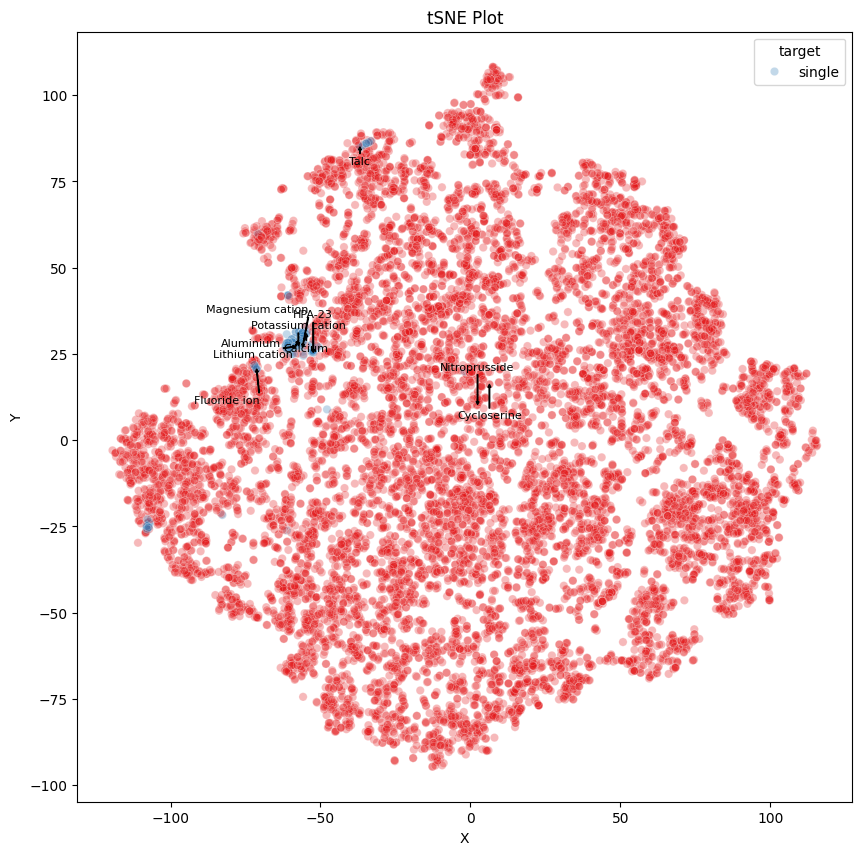

In [16]:
ax, df_tSNE = plot_tSNE(arr_embedded_mols, ids, figsize=(10,10), n_iter=2000, verbose=0,
                       hue_callback=hue_callback,
                       title="tSNE Plot")

annotate_smiles("[F-]", df_tSNE, x_shift=-10, y_shift=-10)
annotate_smiles("[K+]", df_tSNE, x_shift=0, y_shift=5)
annotate_smiles("[Li+]", df_tSNE, x_shift=-15, y_shift=-5)
annotate_smiles("[Al]", df_tSNE, x_shift=-15, y_shift=0)
annotate_smiles("[Ca]", df_tSNE, x_shift=0, y_shift=-5)
annotate_smiles("[Mg++]", df_tSNE, x_shift=-15, y_shift=10)
	
annotate_id("DB09511", df_tSNE, x_shift=0, y_shift=-5)#Talc
annotate_id("DB17739", df_tSNE, x_shift=0, y_shift=10)#HPA-23

atom1, atom2 , *_ = df_tSNE[(df_tSNE['X'] > 0) & (df_tSNE['X'] < 10) & (df_tSNE['Y'] > 0) & (df_tSNE['Y'] < 20)].to_numpy()
annotate_id(atom1[2], df_tSNE, x_shift=0, y_shift=-10)
annotate_id(atom2[2], df_tSNE, x_shift=0, y_shift=10)

In [17]:
atom1, atom2 , *_ = df_tSNE[(df_tSNE['X'] > 0) & (df_tSNE['X'] < 10) & (df_tSNE['Y'] > 0) & (df_tSNE['Y'] < 20)].to_numpy()

In [18]:
atom1

array([6.316173076629639, 16.19366455078125, 'DB00260', ''], dtype=object)

In [19]:
get_plot_info_by_id("DB00412", df_tSNE), get_plot_info_by_id("DB00527", df_tSNE)

((-49.895999908447266,
  -20.585861206054688,
  'DB00412',
  'Rosiglitazone',
  'small molecule'),
 (2.7982380390167236,
  -80.1916732788086,
  'DB00527',
  'Cinchocaine',
  'small molecule'))